In [90]:
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt

In [91]:
geomodel = gp.create_model("X-field")

In [92]:
basedir = 'model_input/'

In [98]:
gp.init_data(geomodel, [5000., 20000.,2500.,12500.,9000.,12000.], [50,50,50],
            path_i = basedir + 'welloc.csv',
            path_o = basedir + 'orientations.csv',
            default_values=True)

Active grids: ['regular']


X-field  2019-10-26 12:53

In [99]:
gp.get_data(geomodel, 'surface_points')

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
128,11584.500000,8892.310000,9810.0,0.572932,0.482668,0.445571,fault1,Fault_Series,1,1,1.000000e-08
129,11663.572861,8750.193989,10300.0,0.579005,0.471753,0.483204,fault1,Fault_Series,1,1,1.000000e-08
130,11668.349359,8741.612575,11500.0,0.579372,0.471094,0.575366,fault1,Fault_Series,1,1,1.000000e-08
0,10532.520904,7213.263430,9896.0,0.492138,0.353714,0.452176,chalk,Strat_Series,2,2,1.000000e-08
1,10532.520904,7213.263430,9996.0,0.492138,0.353714,0.459856,chalk,Strat_Series,2,2,1.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...
123,10532.520904,7213.263430,10427.0,0.492138,0.353714,0.492957,main_sand,Strat_Series,4,2,1.000000e-08
124,10532.520904,7213.263430,10527.0,0.492138,0.353714,0.500638,main_sand,Strat_Series,4,2,1.000000e-08
125,10532.520904,7213.263430,10550.0,0.492138,0.353714,0.502404,main_sand,Strat_Series,4,2,1.000000e-08
126,10532.520904,7213.263430,10567.0,0.492138,0.353714,0.503710,main_sand,Strat_Series,4,2,1.000000e-08


In [100]:
geomodel.surfaces

,surface,series,order_surfaces,isBasement,color,id
3,fault1,Fault_Series,1,False,#728f02,1
0,chalk,Strat_Series,1,False,#015482,2
1,kimmeredge_clay,Strat_Series,2,False,#9f0052,3
2,main_sand,Strat_Series,3,False,#ffbe00,4
4,basement,Basement,1,True,#443988,5


In [101]:
gp.map_series_to_surfaces(geomodel,{"Fault_Series":'fault1', 
                             "Strat_Series": ('chalk','kimmeredge_clay',
                                            'main_sand', 'basement')}, remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
3,fault1,Fault_Series,1,False,#728f02,1
0,chalk,Strat_Series,1,False,#015482,2
1,kimmeredge_clay,Strat_Series,2,False,#9f0052,3
2,main_sand,Strat_Series,3,False,#ffbe00,4
4,basement,Strat_Series,4,True,#443988,5


In [102]:
geomodel.grid

Grid Object. Values: 
array([[ 5150.,  2600.,  9030.],
       [ 5150.,  2600.,  9090.],
       [ 5150.,  2600.,  9150.],
       ...,
       [19850., 12400., 11850.],
       [19850., 12400., 11910.],
       [19850., 12400., 11970.]])

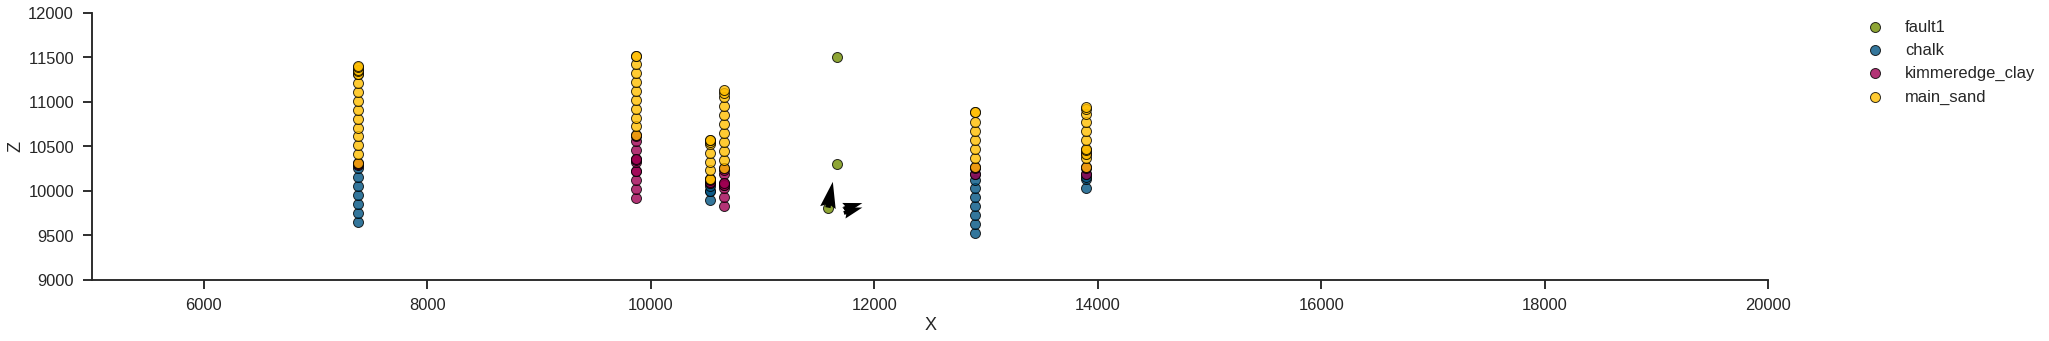

In [103]:
gp.plot.plot_data(geomodel, direction='y')

In [ ]:
gp.plot.plot_3D(geomodel)

In [104]:
gp.set_interpolation_data(geomodel,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])


Compiling theano function...
Compilation Done!


In [105]:
gp.get_data(geomodel, 'kriging')

,values
range,18275.7
$C_o$,7.95238e+06
drift equations,"[3, 3]"
nugget grad,0.01
nugget scalar,1e-06


In [106]:
geomodel.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,4
number series,2
number surfaces per series,"[1, 3]"
len surfaces surface_points,"[3, 24, 38, 66]"
len series surface_points,"[3, 128]"
len series orientations,"[1, 2]"


In [107]:
sol = gp.compute_model(geomodel, compute_mesh=True)

/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/gempy/core/solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))


In [110]:
sol


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

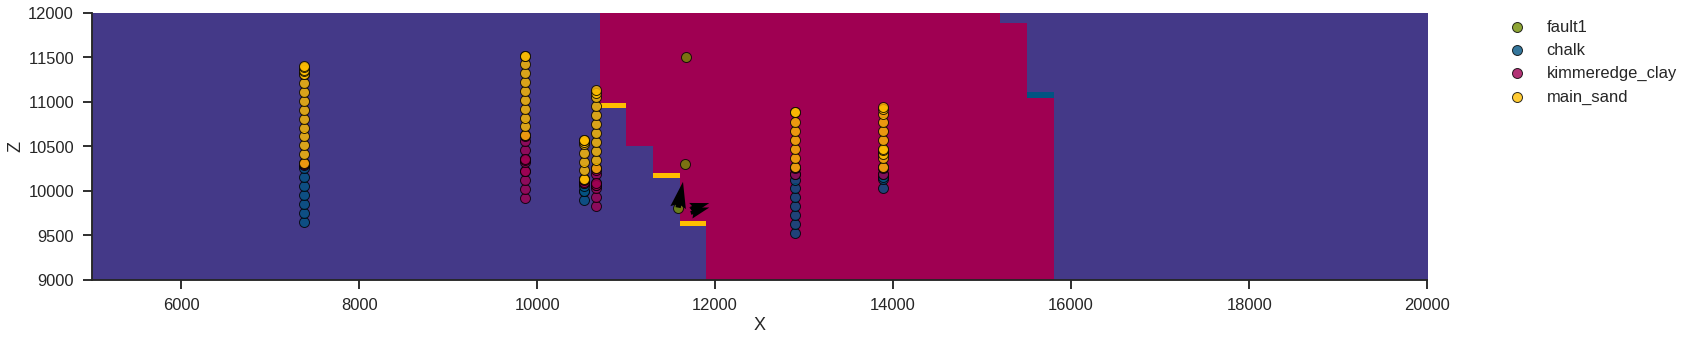

In [111]:
%matplotlib inline
gp.plot.plot_section(geomodel, cell_number=25,
                     direction='y', show_data=True)

In [63]:
gp.plot.plot_map(geomodel)

AttributeError: 'NoneType' object has no attribute 'reshape'